In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


# Importing all the required modules.

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Importing data files from given csv.

In [3]:
crop_df = pd.read_csv('../input/crop-recommendation-dataset/Crop_recommendation.csv')
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Checking for null values.

In [4]:
crop_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### It shows that, there's no null values in the given dataset.

# 1. Nitrogen

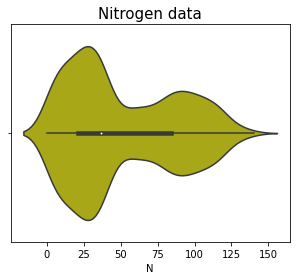

In [5]:
plt.figure(figsize=(5,4))
sns.violinplot(x='N',data=crop_df,color='y');
plt.title("Nitrogen data",{'fontsize':15});

# 2. Potassium

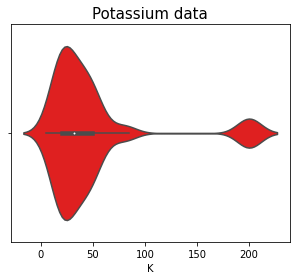

In [6]:
plt.figure(figsize=(5,4))
sns.violinplot(x='K',data=crop_df,color='r');
plt.title("Potassium data",{'fontsize':15});

# 3. Phosphorus.

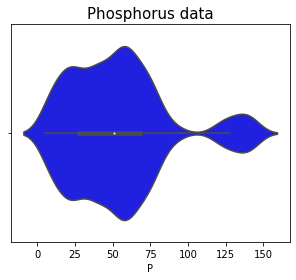

In [7]:
plt.figure(figsize=(5,4))
sns.violinplot(x='P',data=crop_df,color='b');
plt.title("Phosphorus data",{'fontsize':15});

# 4. Temperature.

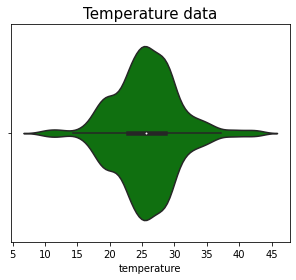

In [8]:
plt.figure(figsize=(5,4))
sns.violinplot(x='temperature',data=crop_df,color='g');
plt.title("Temperature data",{'fontsize':15});

# 5. Humidity.

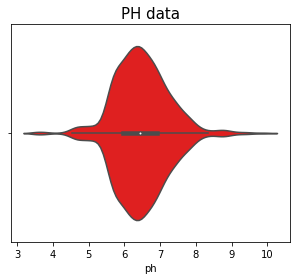

In [9]:
plt.figure(figsize=(5,4))
sns.violinplot(x='ph',data=crop_df,color='r');
plt.title("PH data",{'fontsize':15});

# Listing column names of given dataset

In [10]:
crop_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

## Table 

In [11]:
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
crop_df['no_label'] = pd.Categorical(crop_df.label).codes

### Droping the no_label.

In [13]:
X = crop_df.drop(['label','no_label'],axis=1)
y = crop_df.no_label

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Building Model.

In [15]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [16]:
models = {
    LogisticRegression(max_iter=500):'Logistic',
    RandomForestClassifier():'Forest',
    SVC():'Support Vector Machine'
}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print("Accuracy for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy for {name} is :  97.04545454545455 %
Accuracy for {name} is :  99.77272727272727 %
Accuracy for {name} is :  97.72727272727273 %


### accuracy score for Forest is 100%.

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        18
           8       0.96      1.00      0.98        22
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        17
          17       1.00    

# Predictions.

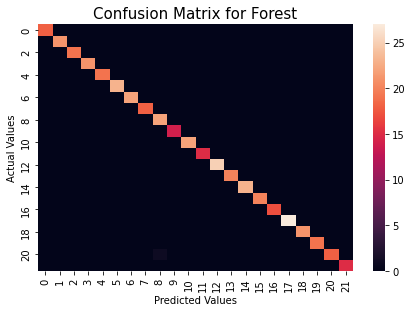

In [19]:
class_names = np.arange(0,21)
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = False,fmt = 'd')
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion Matrix for Forest', {'fontsize':15})
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Thank you .